In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(city_df,ride_df, how ='outer',on ='city')
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

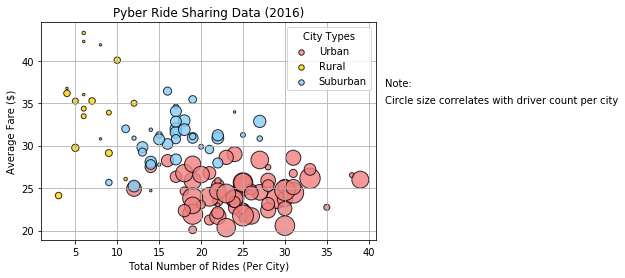

In [2]:
# Obtain the x and y coordinates for each of the three city types
# for urban city type
## Retrieve the data with type is Urban
urban_df = combined_df.loc[combined_df["type"] == "Urban",:]
## Calculate the average fare in each city
urban_average_fare = urban_df.groupby("city")["fare"].mean()
## Calculate the number of rides in each city
urban_number_rides = urban_df.groupby("city")["ride_id"].count()
## Calculate the number of drivers in each city 
urban_driver = urban_df.groupby("city")["driver_count"].mean()
# for rural city type
## Retrieve the data with type is Rural
rural_df = combined_df.loc[combined_df["type"] == "Rural",:]
## Calculate the average fare in each city
rural_average_fare = rural_df.groupby("city")["fare"].mean()
## Calculate the number of rides in each city
rural_number_rides = rural_df.groupby("city")["ride_id"].count()
## Calculate the number of drivers in each city
rural_driver = rural_df.groupby("city")["driver_count"].mean()
# for suburban city types
## Retrieve the data with type is Suburban
suburban_df = combined_df.loc[combined_df["type"] == "Suburban",:]
## Calculate the average fare in each city
suburban_average_fare = suburban_df.groupby("city")["fare"].mean()
## Calculate the number of rides in each city
suburban_number_rides = suburban_df.groupby("city")["ride_id"].count()
## Calculate the number of drivers in each city
suburban_driver = suburban_df.groupby("city")["driver_count"].mean()

# Build the scatter plots for each city types
urbanscatter = plt.scatter(urban_number_rides, urban_average_fare, s=urban_driver*6,
            marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.8, label = "Urban")
ruralscatter = plt.scatter(rural_number_rides, rural_average_fare, s=rural_driver*6,
            marker="o", facecolors="gold", edgecolors="black", alpha=0.8, label = "Rural")
suburbanscatter = plt.scatter(suburban_number_rides, suburban_average_fare, s=suburban_driver*6,
            marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.8,label = "Suburban")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
# Create a legend
lgnd = plt.legend(loc="best",title = "City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
plt.text(42,37,"Note:")
plt.text(42,35,"Circle size correlates with driver count per city" )
# Save Figure 
plt.savefig("../Images/01Pyberscatterdata.png")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

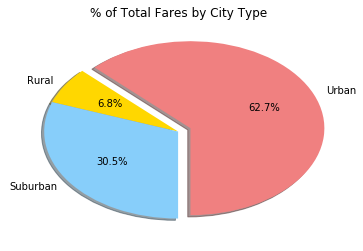

In [3]:
##### Calculate Type Percents
## Calculate the total fare
total_fare = combined_df["fare"].sum()
## Calculate the total fare in three different city types
urban_total_fare = urban_df["fare"].sum()
rural_total_fare = rural_df["fare"].sum()
suburban_total_fare = suburban_df["fare"].sum()
## Cauculate the percents
urban_percent = round(urban_total_fare/total_fare,3)*100
rural_percent = round(rural_total_fare/total_fare,3)*100
suburban_percent = round(suburban_total_fare/total_fare,3)*100

# Build Pie Chart
labels = ["Urban","Rural","Suburban"]
percents = [urban_percent,rural_percent,suburban_percent]
explode = [0.1,0,0]
colors = ["lightcoral","gold","lightskyblue"] 

plt.pie(percents,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/02Pyberpiedata.png")
# Show Figure
plt.show()

## Total Rides by City Type

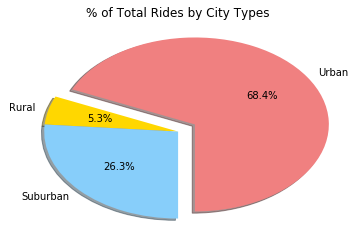

In [27]:
# Calculate Ride Percents
## Calculate the total rides
total_rides = combined_df["ride_id"].count()
## Calculate the total rides in three different city types
urban_total_rides = urban_df["ride_id"].count()
rural_total_rides = rural_df["ride_id"].count()
suburban_total_rides = suburban_df["ride_id"].count()
## Calculate the percents of rides for three city types
urban_rides_percents = round(urban_total_rides/total_rides,3)*100
rural_rides_percents = round(rural_total_rides/total_rides,3)*100
suburban_rides_percents = round(suburban_total_rides/total_rides,3)*100
# Build Pie Chart
labels = ["Urban","Rural","Suburban"]
percents = [urban_rides_percents,rural_rides_percents,suburban_rides_percents]
explode = [0.15,0,0]
colors = ["lightcoral","gold","lightskyblue"] 
plt.title("% of Total Rides by City Types")
plt.pie(percents,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)

# Save Figure
plt.savefig("../Images/03Pyberpiedata.png")
# Show Figure
plt.show()

In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

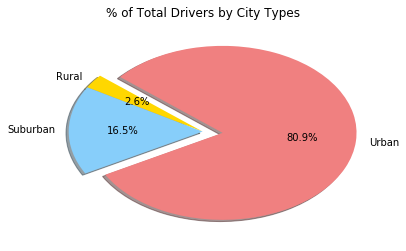

In [43]:
# Calculate Driver Percents
## Calculate total drivers in each city types
total_drivers = city_df.groupby("type")["driver_count"].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = [0,0,0.15]
colors = ["gold","lightskyblue","lightcoral"] 
plt.title("% of Total Drivers by City Types")
plt.pie(total_drivers,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


# # Save Figure
plt.savefig("../Images/04Pyberpiedata.png")

In [4]:
print("Three observable trends:")
print("-"*50)
print("1) Highly developed urban and suburban area have more drivers and rides compared with less developed rural area. Because urban and suburban area have larger population and higher population dense.")
print("2) The average fare in urban area tends to be the cheapest and the average fare in rural area tends to be the most expensive. This is probably because in the rural area the riding distances are always longer than the urban area.")
print("3) Even though the average fare is high in rural area, the percent of toal fare in rural area is very small. On the contrary, over 90% of total fares are coming from urban and suburban area.")
print("-"*50)

Three observable trends:
--------------------------------------------------
1) Highly developed urban and suburban area have more drivers and rides compared with less developed rural area. Because urban and suburban area have larger population and higher population dense.
2) The average fare in urban area tends to be the cheapest and the average fare in rural area tends to be the most expensive. This is probably because in the rural area the riding distances are always longer than the urban area.
3) Even though the average fare is high in rural area, the percent of toal fare in rural area is very small. On the contrary, over 90% of total fares are coming from urban and suburban area.
--------------------------------------------------
